# Identifying health risk factors and improving popular machine learning algorithms to predict diabetes in US citizens.
Created by Natalia Kardami and Sue-Ellen Bernadina

# Importing Libraries and Constructing the DataFrame


In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
data=pd.read_csv("diabetes.csv") #read file

rows = [] #create rows
for row in data:
        rows.append(row)


In [3]:
#Display DataFrame
df = pd.DataFrame(data, columns=rows)
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Atrribute Exploration & Cleaning the Data 

In [4]:
df.shape # size of dataframe

(253680, 22)

In [5]:
# Displaying statistical measures for each 
df.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.info() #checking for null values and attribute types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
print("Values missing from each attribute")
print(df.isnull().sum()) # check for missing falues
df.shape

Values missing from each attribute
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


(253680, 22)

In [8]:
#dropping duplicates
data = df.copy()
old_shape = df.shape[0]
print(old_shape)
df.loc[df.duplicated(),:]
df.drop_duplicates(inplace=True)
print("Removed "+ str(old_shape - df.shape[0]) +" duplicates") # found 24206 duplicate entries
print("New sample size: "+ str(df.shape[0]))

253680
Removed 24206 duplicates
New sample size: 229474


# Separating X and y

In [9]:
# Extracting Y class
old = df

X = df.copy()
y = X.pop('Diabetes_binary')
#print(y.head())
print(X.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0      5.0   
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

In [10]:
print(y.iloc[:20])
print(type(y))

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
Name: Diabetes_binary, dtype: float64
<class 'pandas.core.series.Series'>


In [11]:
col_names = X.keys()
col_names

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Exploring the data

                     Histograms of all attributes
Figure: Exploratory analysis of all independent variables


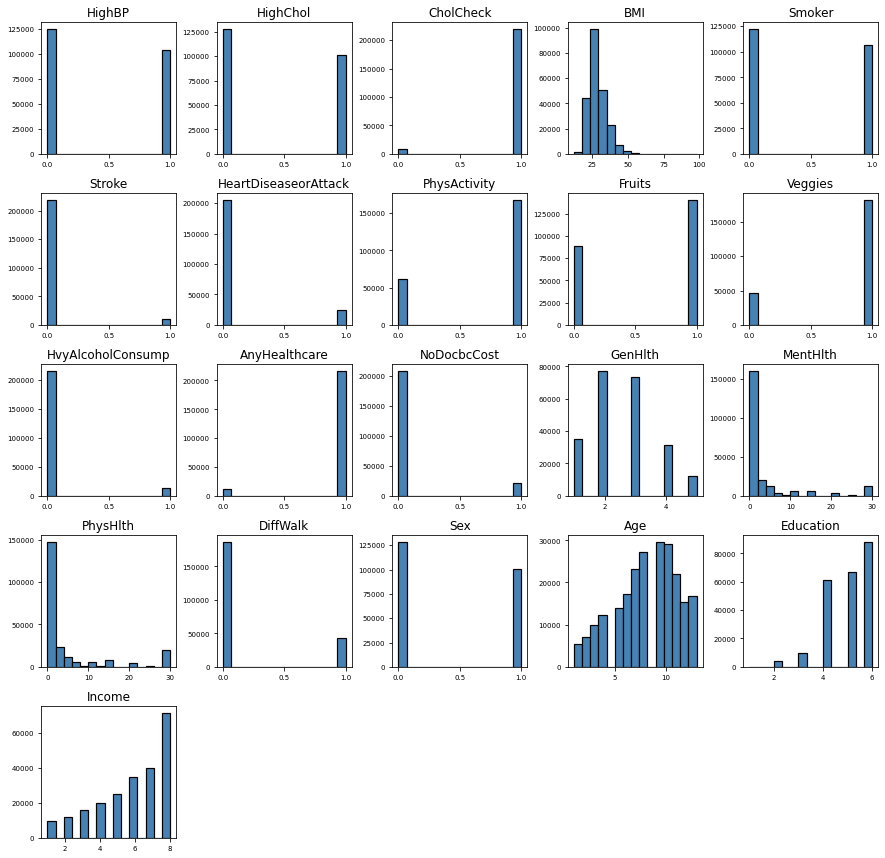

In [12]:
#plt.figure(figsize=(10,10))
print("                     Histograms of all attributes")

axs= X.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.2, xlabelsize=7, ylabelsize=7, grid=False,figsize=(15,15),column=col_names)
#ax = X.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='My title')

print("Figure: Exploratory analysis of all independent variables")

In [13]:
#X.plot(kind='hist',xlim=(0,60),bins=18,subplots=True,layout=(5,5),figsize=(20,20),sharex=False, linewidth=1.2,grid=True)
#plt.show()

# Addressing the Class Imbalance Problem:

Diabetes to No Diabetes ratio: 0.18056148618406498


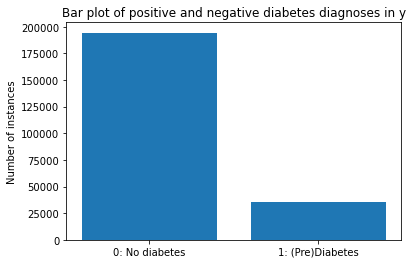

Figure i: Illustrating the class imbalance in our dataset using a bar plot


In [14]:
#Class Imbalance

zero, one = (y.value_counts())
print("Diabetes to No Diabetes ratio: "+str(one/zero))
data = [zero,one]
lab = ('0: No diabetes','1: (Pre)Diabetes')
plt.figure()
plt.title("Bar plot of positive and negative diabetes diagnoses in y")
plt.ylabel("Number of instances")
plt.bar(lab,data)
plt.show()
print("Figure i: Illustrating the class imbalance in our dataset using a bar plot")

According to google.developer.com, $\approx 18\%$ minority to majority class ratio is considered of moderate imbalance. In order to take good random samples, we need to employ a downsampling or oversampling principle.

## Taking a stratified sample for the heatmap

In [15]:
# sample & partition dataset into 4 sets equally: 2 X sets and 2 y sets where the classes in y are more balanced
from collections import Counter
from sklearn.model_selection import train_test_split
print(Counter(y))
X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.01, random_state=42, stratify=y) # Stratified Split
print(Counter(y_1))
print(len(X_2))

Counter({0.0: 194377, 1.0: 35097})
Counter({0.0: 192433, 1.0: 34746})
2295


In [16]:

print(y_1.head())
no = y_1==0
negative = y_1[no]
print(negative.size)
yes =  y==1
positive = y_1[yes]
print(positive.size)
print(positive.size/negative.size)


19016     0.0
163599    0.0
72777     0.0
73800     0.0
58891     0.0
Name: Diabetes_binary, dtype: float64
192433
34746
0.18056154609656347


## Attribute Correlation

### Pearson Correlation Coefficient (with respect to y)

In [17]:
#calculate pearson correlation coefficient of attributes with respect to y
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
#"weak" attributes
# print variables of low interest, to 
corr_list =[]
interest = {} # selecting variables of interest
attribute_names =  col_names.tolist()

for label,content in X.items():
    corr = scipy.stats.pearsonr(content,y)
    corr_list.append(corr)
    print("PCC for "+ label +"=" + str(corr[0]))
        
    if abs(corr[0])<0.05:
        interest.update({label:corr[0]})
    
print(interest)    
sorted(interest.items(),key=lambda x:x[1],reverse=True)

PCC for HighBP=0.2543180248132091
PCC for HighChol=0.1949441090859263
PCC for CholCheck=0.07252338094083094
PCC for BMI=0.20508596365507925
PCC for Smoker=0.04550398911139827
PCC for Stroke=0.09919329666985574
PCC for HeartDiseaseorAttack=0.16821317327598329
PCC for PhysActivity=-0.10040433162207854
PCC for Fruits=-0.024805336132508203
PCC for Veggies=-0.041733764172856014
PCC for HvyAlcoholConsump=-0.06595001842698239
PCC for AnyHealthcare=0.025331336307734254
PCC for NoDocbcCost=0.020048275618901417
PCC for GenHlth=0.2769398176690623
PCC for MentHlth=0.05415267828059037
PCC for PhysHlth=0.15621082600260372
PCC for DiffWalk=0.20530218595963953
PCC for Sex=0.03272416229205701
PCC for Age=0.177263347282752
PCC for Education=-0.1026861521388132
PCC for Income=-0.1406587397815645
{'Smoker': 0.04550398911139827, 'Fruits': -0.024805336132508203, 'Veggies': -0.041733764172856014, 'AnyHealthcare': 0.025331336307734254, 'NoDocbcCost': 0.020048275618901417, 'Sex': 0.03272416229205701}


[('Smoker', 0.04550398911139827),
 ('Sex', 0.03272416229205701),
 ('AnyHealthcare', 0.025331336307734254),
 ('NoDocbcCost', 0.020048275618901417),
 ('Fruits', -0.024805336132508203),
 ('Veggies', -0.041733764172856014)]

### Heatmap of correlation coefficients

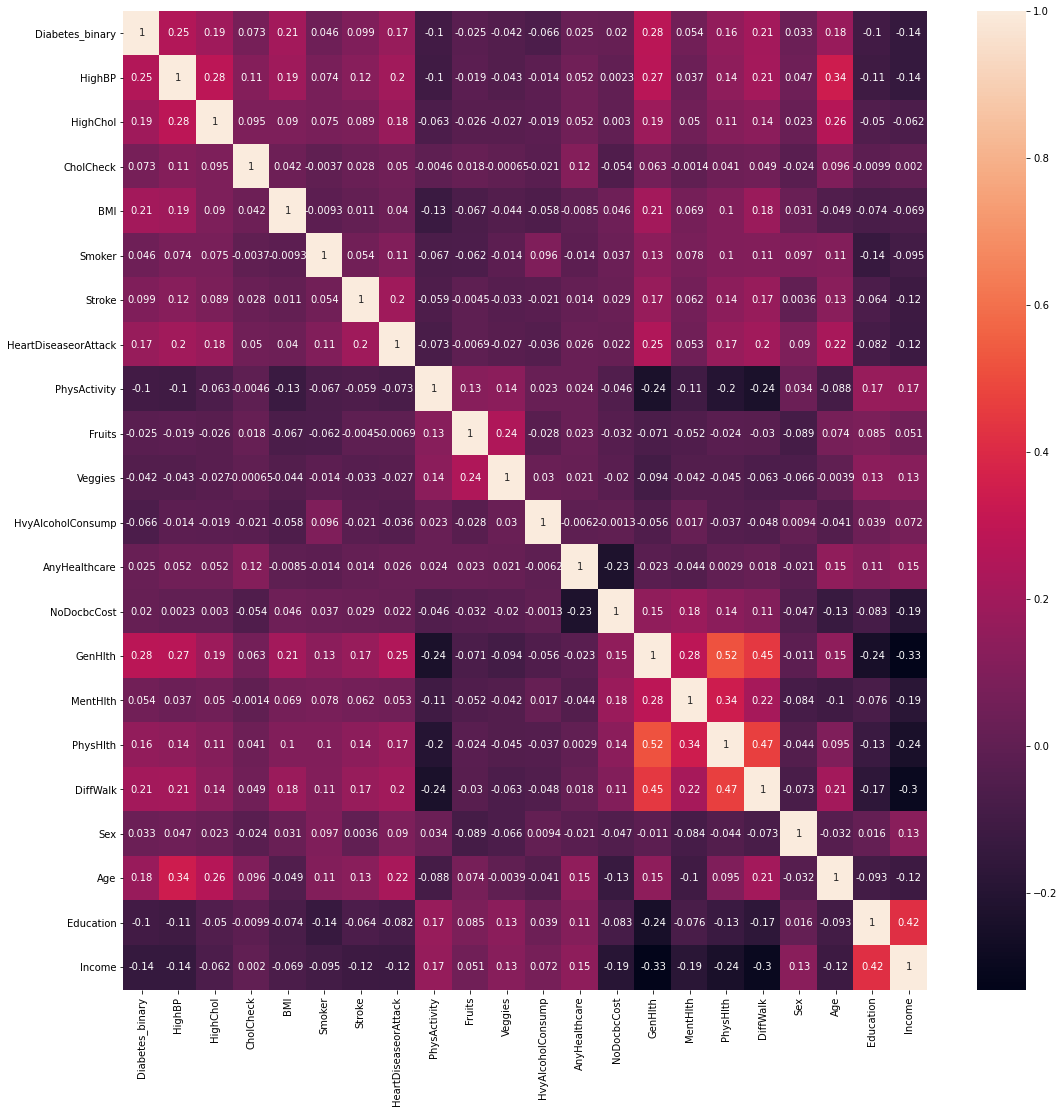

In [18]:
#check heatmap of all variables 
#sample df
#"duplicate" attributes
df_samp = X_2 # taking stratified sample because X takes too long
corr = np.corrcoef(df_samp)
corr_matrix = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix,annot=True)
plt.show()


## Dropping highly correlated variables:
#### From PCC
We check for variables that have a correlation higher than the threshold of |0.04|.




In [19]:
X.drop(['DiffWalk','PhysHlth','Education'], axis=1,inplace=True)

#### From heatmap
We set an acceptance threshold of |0.05| of the Pearson Correlation Coefficient, which tells us which variables have little effect on our class variable. These are the following:


 ('Smoker', 0.04550398911142438),
 ('Sex', 0.03272416229206401),
 ('AnyHealthcare', 0.02533133630772611),
 ('NoDocbcCost', 0.020048275618898107),
 ('Fruits', -0.024805336132517033),
 ('Veggies', -0.04173376417288313)
 
 The insignificance of fruits and veggies is supported by our research which claims that it is not a good measure.
 
 

In [20]:
X.drop(['Smoker','Sex','AnyHealthcare','NoDocbcCost','Fruits','Veggies'], axis=1,inplace=True)

In [21]:
X.keys()

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'Age', 'Income'],
      dtype='object')

In [22]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,Age,Income
0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,5.0,18.0,9.0,3.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,0.0,3.0,0.0,7.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,9.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,11.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,1.0,0.0,2.0,3.0,11.0,4.0


# Oversampling Data with SMOTE

In [23]:
# OVERSAMPLING WITH ADASYN
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import LinearSVC
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))

[(0.0, 194377), (1.0, 194377)]


# Models

In [24]:
# Imports
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

# Naive Bayes

## Simple Complementary Naive Bayes


In [25]:
def plot_roc_curve(fp, tp, name, title=''):
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    # plot model roc curve
    plt.plot(fp, tp, marker='.', label=name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    string = 'ROC curve for %s' % title
    plt.title(string)
    # show the legend
    plt.legend()
    # show the plot
    plt.show()


https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

In [26]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.model_selection import train_test_split
print(Counter(y))
X = X.copy()
#y = X.pop('Diabetes_binary')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # Stratified Split
print(Counter(y_train).items())
print(Counter(y_test))
print(X_test.shape)
print(X_train.shape)
print(y_test.values)

Counter({0.0: 194377, 1.0: 35097})
dict_items([(0.0, 97188), (1.0, 17549)])
Counter({0.0: 97189, 1.0: 17548})
(114737, 12)
(114737, 12)
[0. 0. 0. ... 0. 1. 0.]


              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80     97189
         1.0       0.30      0.67      0.41     17548

    accuracy                           0.71    114737
   macro avg       0.61      0.69      0.61    114737
weighted avg       0.83      0.71      0.74    114737



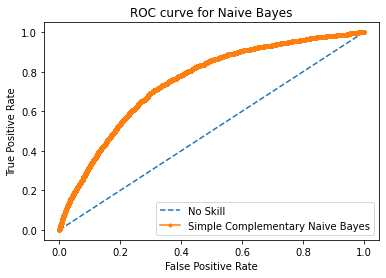

Number of mislabeled points out of a total 114737 points : 33733
Training set score: 0.7073
Test set score: 0.7060


In [27]:
#Naive Bayes

scaler = MinMaxScaler()
#Create a Classifier
model = make_pipeline(MinMaxScaler(),ComplementNB())

# Train the model using the training sets

model.fit(X_train,y_train)

#Scale test data
scaler.fit_transform(X_test)

#Predict Output
y_pred= model.predict(X_test) 

print(classification_report(y_test, y_pred, zero_division= True))

#roc curve data collection
prob_pred_11 = model.predict_proba(X_test)
probability_class_1_11 = prob_pred_11[:, 1]

fp11, tp11, thr11 = roc_curve(y_test, probability_class_1_11)

plot_roc_curve(fp11, tp11, 'Simple Complementary Naive Bayes', 'Naive Bayes')

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
score = model.score(X_test, y_test)

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

## Complementary Naive Bayes, KFold, with scaled data

Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Data fitted!
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79     19437
         1.0       0.26      0.58      0.36      3510

    accuracy                           0.68     22947
   macro avg       0.58      0.64      0.57     22947
weighted avg       0.80      0.68      0.72     22947



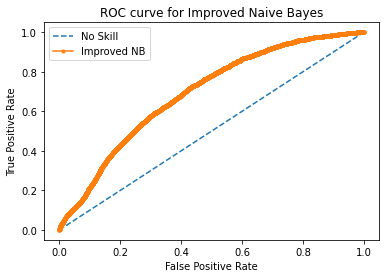

Number of mislabeled points out of a total 22947 points : 7304
Training set score: 0.7091
Test set score: 0.6817


In [28]:
#X_t,y_t = X_resampled, y_resampled
X_t,y_t = X, y
cnb = ComplementNB()
runs = 10
skf = StratifiedKFold(n_splits=10)
for i in range(runs):  
    print("Epoch ",i+1)
    for train_index, test_index in skf.split(X_t, y_t):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_t.iloc[train_index], X_t.iloc[test_index]
        y_train, y_test = y_t.iloc[train_index], y_t.iloc[test_index]
        cnb.partial_fit(X_train, y_train, sample_weight=None,classes=np.unique(y))
        #cnb.fit(X_train, y_train)

print("Data fitted!")

# scale test data
scaler.fit_transform(X_test)
#Predict Output
y_pred= cnb.predict(X_test) 
print(classification_report(y_test, y_pred, zero_division= True))

# roc
prob_pred_12 = cnb.predict_proba(X_test)
probability_class_1_12 = prob_pred_12[:, 1]
fp12, tp12, thr12 = roc_curve(y_test, probability_class_1_12)

plot_roc_curve(fp12, tp12, 'Improved NB', 'Improved Naive Bayes')

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
score = cnb.score(X_test, y_test)

print('Training set score: {:.4f}'.format(cnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(cnb.score(X_test, y_test)))


## Results
CNB :
    
    Number of mislabeled points out of a total 114737 points : 33733
    Score:  0.7059971935818437
    Training set score: 0.7073
    Test set score: 0.7060
    


CNB with Kfold:
    
    Number of mislabeled points out of a total 22947 points : 7304
    Score:  0.6817013117183074
    Training set score: 0.7091
    Test set score: 0.6817
    
CNB with SMOTE and Kfold: 

    Number of mislabeled points out of a total 38875 points : 15033
    Score:  0.6132990353697749
    Training set score: 0.6340
    Test set score: 0.6133
    

In [29]:
# override old partitions to prevent data leakage
X = X.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # Stratified Split
print(Counter(y_train).items())
print(Counter(y_test))
print(X_test.shape)
print(X_train.shape)

dict_items([(0.0, 97188), (1.0, 17549)])
Counter({0.0: 97189, 1.0: 17548})
(114737, 12)
(114737, 12)


## Random Forest

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     97189
         1.0       1.00      0.00      0.00     17548

    accuracy                           0.85    114737
   macro avg       0.92      0.50      0.46    114737
weighted avg       0.87      0.85      0.78    114737



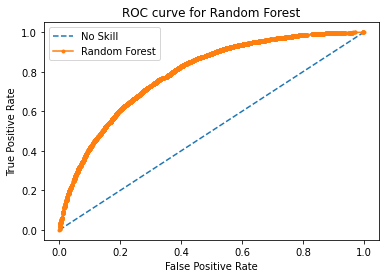

Number of mislabeled points out of a total 114737 points : 17548
Training set score: 0.8471
Test set score: 0.8471


In [30]:
scaler = MinMaxScaler()

#Create a Classifier
rf = make_pipeline(scaler,RandomForestClassifier(n_estimators =100,criterion = "log_loss",max_depth=2, random_state=0))

# Train the model using the training sets
rf.fit(X_train, y_train)

# scale test data
scaler.fit_transform(X_test)
#Predict Output
y_pred= rf.predict(X_test) 

print(classification_report(y_test, y_pred, zero_division= True))

# roc
prob_pred_21 = rf.predict_proba(X_test)
probability_class_1_21 = prob_pred_21[:, 1]

fp21, tp21, thr21 = roc_curve(y_test, probability_class_1_21)

plot_roc_curve(fp21, tp21, 'Random Forest', 'Random Forest')

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
score = rf.score(X_test, y_test)

# 17549 mislabelled points
print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))

# 17548 mislabelled points
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

## Weighted Random Forest

Hyperparameter tuning: best max_depth accuracy tradeoff = 2, 17548

https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built%2Din%20Feature%20Importance&text=It%20is%20a%20set%20of,sets%20with%20similars%20responses%20within.

https://stackoverflow.com/questions/72909466/class-weight-and-sample-weight-ineffective-for-sklearn-random-forest


              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     97189
         1.0       1.00      0.00      0.00     17548

    accuracy                           0.85    114737
   macro avg       0.92      0.50      0.46    114737
weighted avg       0.87      0.85      0.78    114737



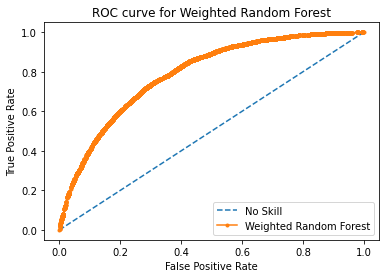

Number of mislabeled points out of a total 114737 points : 17548
Training set score: 0.8471
Test set score: 0.8471


In [31]:
scaler = MinMaxScaler()
class_weight = {0: 1,
                1: 1.1}
#Create a Classifier
wrf = make_pipeline(scaler,RandomForestClassifier(n_estimators =100,criterion = "log_loss",max_depth=2, random_state=12,class_weight=class_weight))

# Train the model using the training sets
wrf.fit(X_train, y_train)


# scale test data
scaler.fit_transform(X_test)

#Predict Output
y_pred= wrf.predict(X_test) 

print(classification_report(y_test, y_pred, zero_division= True))

#roc
prob_pred_22 = wrf.predict_proba(X_test)
probability_class_1_22 = prob_pred_22[:, 1]
fp22, tp22, thr22 = roc_curve(y_test, probability_class_1_22)

plot_roc_curve(fp22, tp22, 'Weighted Random Forest', 'Weighted Random Forest')

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
score = wrf.score(X_test, y_test)

print('Training set score: {:.4f}'.format(wrf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(wrf.score(X_test, y_test)))

<BarContainer object of 12 artists>

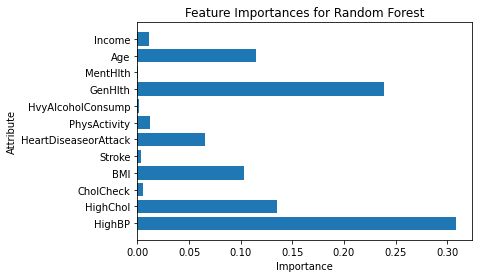

In [32]:

f = wrf[1].feature_importances_

plt.figure()
plt.title("Feature Importances for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Attribute")
plt.barh(X.keys(), f)

**Simple RF**

    Number of mislabeled points out of a total 114737 points : 17548
    Score:  0.8470589260656981
    Training set score: 0.8471
    Test set score: 0.8471


**Weighted RF**

    Number of mislabeled points out of a total 114737 points : 17548
    Score:  0.8470589260656981
    Training set score: 0.8471
    Test set score: 0.8471

## SVC Linear

In [33]:
# override old partitions to prevent data leakage
X = X.copy()
#y = X.pop('Diabetes_binary')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # Stratified Split
print(Counter(y_train).items())
print(Counter(y_test))
print(X_test.shape)
print(X_train.shape)

dict_items([(0.0, 97188), (1.0, 17549)])
Counter({0.0: 97189, 1.0: 17548})
(114737, 12)
(114737, 12)


In [34]:
#X = X_resampled
#y = y_resampled

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # Stratified Split

#Create a Classifier
clf = make_pipeline(MinMaxScaler(),LinearSVC(dual=False))

# Train the model using the training sets
clf.fit(X_train, y_train)

# scale test data
scaler.fit_transform(X_test)

#Predict Output
y_pred= clf.predict(X_test) 

print(classification_report(y_test, y_pred, zero_division= True))

print('ROC cannot be calculated as Linear SVC is a hard classifier.\n')

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
score = clf.score(X_test, y_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     97189
         1.0       0.59      0.06      0.11     17548

    accuracy                           0.85    114737
   macro avg       0.72      0.53      0.51    114737
weighted avg       0.81      0.85      0.79    114737

ROC cannot be calculated as Linear SVC is a hard classifier.

Number of mislabeled points out of a total 114737 points : 17233
Training set score: 0.8491
Test set score: 0.8498


**Linear w regular data:**

    Number of mislabeled points out of a total 114737 points : 17189
    Score:  0.8501878208424484
    Training set score: 0.8497
    Test set score: 0.8502
 
 
**Linear with SMOTE**


    Number of mislabeled points out of a total 194377 points : 50838
    Score:  0.7384567104132691
    Training set score: 0.7383
    Test set score: 0.7385

## Moving from Linear SVC to SMG
#### Linear classifier with SGD training

In [35]:
# override old partitions to prevent data leakage
X = X.copy()
#y = X.pop('Diabetes_binary')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # Stratified Split
print(Counter(y_train).items())
print(Counter(y_test))
print(X_test.shape)
print(X_train.shape)

dict_items([(0.0, 97188), (1.0, 17549)])
Counter({0.0: 97189, 1.0: 17548})
(114737, 12)
(114737, 12)


Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Data fitted!
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     19437
         1.0       0.52      0.18      0.26      3510

    accuracy                           0.85     22947
   macro avg       0.69      0.57      0.59     22947
weighted avg       0.81      0.85      0.82     22947



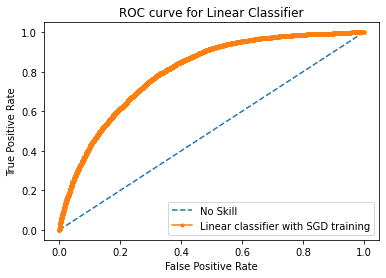

Number of mislabeled points out of a total 22947 points : 3470
Training set score: 0.8484
Test set score: 0.8488


In [36]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
#X = X_resampled
#y = y_resampled
class_weight = {0: 1.1,
                1: 1}
svci = SGDClassifier(class_weight=class_weight,loss='log_loss')
runs = 10
skf = StratifiedKFold(n_splits=10)
for i in range(runs):  
    print("Epoch ",i+1)
    for train_index, test_index in skf.split(X, y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        svci.partial_fit(X_train, y_train, sample_weight=None,classes=np.unique(y))
print("Data fitted!")
# scale test data
scaler.fit_transform(X_test)

#Predict Output
y_pred= svci.predict(X_test)

print(classification_report(y_test, y_pred, zero_division= True))

#roc
prob_pred_32 = svci.predict_proba(X_test)
probability_class_1_32 = prob_pred_32[:, 1]
fp32, tp32, thr32 = roc_curve(y_test, probability_class_1_32)
plot_roc_curve(fp32, tp32, 'Linear classifier with SGD training', 'Linear Classifier')

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
score = svci.score(X_test, y_test)

print('Training set score: {:.4f}'.format(svci.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svci.score(X_test, y_test)))


**log_loss and hinge**

Number of mislabeled points out of a total 22947 points : 3510

Score:  0.8470388286050464

Training set score: 0.8471

Test set score: 0.8470

**modified_huber**

Number of mislabeled points out of a total 22947 points : 3512

Score:  0.8469516712424282

Training set score: 0.8470

Test set score: 0.847

**resampled with log_loss**

Number of mislabeled points out of a total 38875 points : 19438

Score:  0.4999871382636656

Training set score: 0.5000

Test set score: 0.5000


# Ensemble method: Voting Classifier


In [37]:
# override old partitions to prevent data leakage
X = X.copy()
#y = X.pop('Diabetes_binary')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # Stratified Split
print(Counter(y_train).items())
print(Counter(y_test))
print(X_test.shape)
print(X_train.shape)

dict_items([(0.0, 97188), (1.0, 17549)])
Counter({0.0: 97189, 1.0: 17548})
(114737, 12)
(114737, 12)


In [38]:
from sklearn.ensemble import VotingClassifier

ens = VotingClassifier(estimators=[('sgd', svci), ('rf', rf), ('cnb', cnb)], voting='hard')
ens.fit(X_train,y_train)
# scale test data
scaler.fit_transform(X_test)

preds = ens.predict(X_test)

print(classification_report(y_test, preds, zero_division= True))

score = ens.score(X_test, y_test)

#print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

print('Training set score: {:.4f}'.format(ens.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(ens.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     97189
         1.0       0.58      0.06      0.11     17548

    accuracy                           0.85    114737
   macro avg       0.72      0.53      0.51    114737
weighted avg       0.81      0.85      0.79    114737

Training set score: 0.8493
Test set score: 0.8495


In [39]:
# override old partitions to prevent data leakage
X = X.copy()
#y = X.pop('Diabetes_binary')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y) # Stratified Split
print(Counter(y_train).items())
print(Counter(y_test))
print(X_test.shape)
print(X_train.shape)

dict_items([(0.0, 97188), (1.0, 17549)])
Counter({0.0: 97189, 1.0: 17548})
(114737, 12)
(114737, 12)


## Soft voting

In [40]:

ens_soft = VotingClassifier(estimators=[('sgd', svci), ('rf', rf), ('cnb', cnb)], voting='soft',flatten_transform=True)
ens_soft.fit(X_train,y_train)
# scale test data
scaler.fit_transform(X_test)
y_pred = ens_soft.predict(X_test)

print(classification_report(y_test, y_pred, zero_division= True))

score = ens_soft.score(X_test, y_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != ens_soft.predict(X_test)).sum()))

print("Score: ",score)

print('Training set score: {:.4f}'.format(ens_soft.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(ens_soft.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     97189
         1.0       0.52      0.14      0.22     17548

    accuracy                           0.85    114737
   macro avg       0.69      0.56      0.57    114737
weighted avg       0.81      0.85      0.81    114737

Number of mislabeled points out of a total 114737 points : 17359
Score:  0.8487061715052686
Training set score: 0.8481
Test set score: 0.8487


    Number of mislabeled points out of a total 114737 points : 17286
    Score:  0.8493424091618222
    Training set score: 0.8489
    Test set score: 0.8493